In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import japanize_matplotlib

for i in range(21):
    plt.subplots(figsize=[0.1, 0.1])

C:\Users\ys\AppData\Local\Temp\ipykernel_19284\1311249836.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.subplots(figsize=[0.1, 0.1])


In [2]:
import ipywidgets as widgets

button = widgets.Button(description="Click me")
display(button)

Button(description='Click me', style=ButtonStyle())

In [3]:
def on_button_clicked(b):
    print("ボタンがおされたよ！")

button.on_click(on_button_clicked)

In [4]:
from marubatsu import Marubatsu
import math

def play(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False, size=3):
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # 〇×ゲームを再起動する
    self.restart()
   
    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        # リセットボタンを配置する
        button = widgets.Button(description="リセット")
        display(button)
        
        # リセットボタンのイベントハンドラを定義する
        def on_button_clicked(b):
            print("ボタンがおされたよ！")    
            
        # イベントハンドラをリセットボタンに結びつける
        button.on_click(on_button_clicked)

        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合で、ゲーム中の場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)
        
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
            

    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ゲーム盤の表示
        if verbose:
            if gui:
                # AI どうしの対戦の場合は画面を描画しない
                if ai[0] is None or ai[1] is None:
                    self.draw_board(ax)
                # 手番を人間が担当する場合は、play メソッドを終了する
                if ai[index] is None:
                    return
            else:
                print(self)
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board(ax)
        else:
            print(self)
            
    return self.status       

Marubatsu.play = play

Button(description='リセット', style=ButtonStyle())

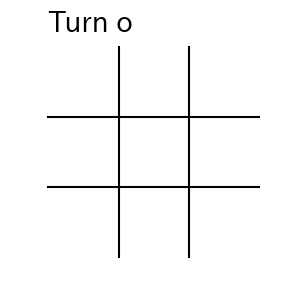

In [5]:
mb = Marubatsu()
mb.play(ai=[None, None], gui=True)

In [6]:
def play(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False, size=3):
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # 〇×ゲームを再起動する
    self.restart()
    
    # リセットボタンを配置する
    button = widgets.Button(description="リセット")
    display(button)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()     
        
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 現在の手番を表す ai のインデックスを計算する
                index = 0 if self.turn == Marubatsu.CIRCLE else 1
                # ゲームの決着がついていない場合に、ai が着手を行うかどうかを判定する
                if self.status == Marubatsu.PLAYING and ai[index] is not None:                
                    x, y = ai[index](self, **params[index])
                    self.move(x, y) 
                    self.draw_board(ax)
                   
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ゲーム盤の表示
        if verbose:
            if gui:
                # AI どうしの対戦の場合は画面を描画しない
                if ai[0] is None or ai[1] is None:
                    self.draw_board(ax)
                # 手番を人間が担当する場合は、play メソッドを終了する
                if ai[index] is None:
                    return
            else:
                print(self)
                
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board(ax)
        else:
            print(self)
            
    return self.status
    
Marubatsu.play = play

Button(description='リセット', style=ButtonStyle())

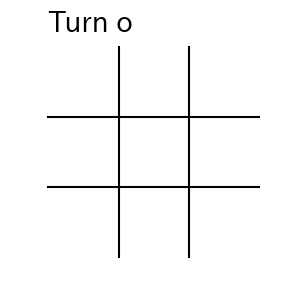

In [7]:
mb.play(ai=[None, None], gui=True)

In [8]:
def play(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False, size=3):
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # 〇×ゲームを再起動する
    self.restart()
    
    # リセットボタンを配置する
    button = widgets.Button(description="リセット")
    display(button)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()       
        self.draw_board(ax)       
         
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 現在の手番を表す ai のインデックスを計算する
                index = 0 if self.turn == Marubatsu.CIRCLE else 1
                # ゲームの決着がついていない場合に、ai が着手を行うかどうかを判定する
                if self.status == Marubatsu.PLAYING and ai[index] is not None:                
                    x, y = ai[index](self, **params[index])
                    self.move(x, y) 
                    self.draw_board(ax)
                   
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ゲーム盤の表示
        if verbose:
            if gui:
                # AI どうしの対戦の場合は画面を描画しない
                if ai[0] is None or ai[1] is None:
                    self.draw_board(ax)
                # 手番を人間が担当する場合は、play メソッドを終了する
                if ai[index] is None:
                    return
            else:
                print(self)
                
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board(ax)
        else:
            print(self)
            
    return self.status
    
Marubatsu.play = play

Button(description='リセット', style=ButtonStyle())

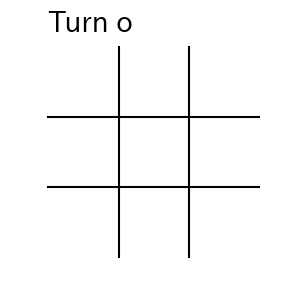

In [9]:
mb.play(ai=[None, None], gui=True)

Button(description='リセット', style=ButtonStyle())

'x'

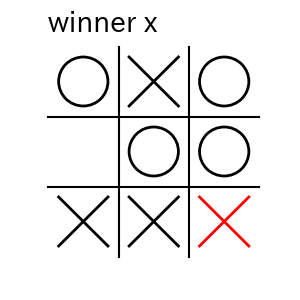

In [10]:
from ai import ai2

mb.play(ai=[ai2, ai2], gui=True)

Button(description='リセット', style=ButtonStyle())

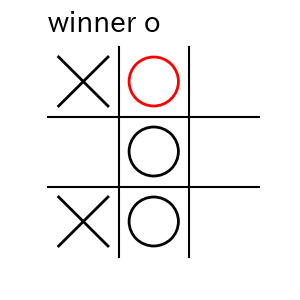

In [11]:
mb.play(ai=[ai2, ai2], gui=True);

In [12]:
def play(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False, size=3):
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # 〇×ゲームを再起動する
    self.restart()
    
    # リセットボタンを配置する
    button = widgets.Button(description="リセット")
    display(button)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()       
        self.draw_board(ax)  
        
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ゲームの決着がついていない場合に、ai が着手を行うかどうかを判定する
        if self.status == Marubatsu.PLAYING and ai[index] is not None:                
            x, y = ai[index](self, **params[index])
            self.move(x, y) 
            self.draw_board(ax)                               
         
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 現在の手番を表す ai のインデックスを計算する
                index = 0 if self.turn == Marubatsu.CIRCLE else 1
                # ゲームの決着がついていない場合に、ai が着手を行うかどうかを判定する
                if self.status == Marubatsu.PLAYING and ai[index] is not None:                
                    x, y = ai[index](self, **params[index])
                    self.move(x, y) 
                    self.draw_board(ax)
                   
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ゲーム盤の表示
        if verbose:
            if gui:
                # AI どうしの対戦の場合は画面を描画しない
                if ai[0] is None or ai[1] is None:
                    self.draw_board(ax)
                # 手番を人間が担当する場合は、play メソッドを終了する
                if ai[index] is None:
                    return
            else:
                print(self)
                
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board(ax)
        else:
            print(self)
            
    return self.status
    
Marubatsu.play = play

Button(description='リセット', style=ButtonStyle())

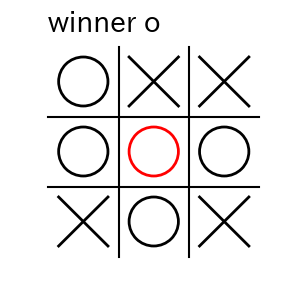

In [13]:
mb.play(ai=[ai2, ai2], gui=True);

In [14]:
def play(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False, size=3):
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # 〇×ゲームを再起動する
    self.restart()
    
    # リセットボタンを配置する
    button = widgets.Button(description="リセット")
    display(button)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()       
        self.draw_board(ax)  
        
        while self.status == Marubatsu.PLAYING:
            # 現在の手番を表す ai のインデックスを計算する
            index = 0 if self.turn == Marubatsu.CIRCLE else 1
            # ai が着手を行うかどうかを判定する
            if ai[index] is not None:                
                x, y = ai[index](self, **params[index])
                self.move(x, y) 
                self.draw_board(ax)                               
            else:
                # 人間の手番の場合は、イベントハンドラを終了する
                return
         
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 現在の手番を表す ai のインデックスを計算する
                index = 0 if self.turn == Marubatsu.CIRCLE else 1
                # ゲームの決着がついていない場合に、ai が着手を行うかどうかを判定する
                if self.status == Marubatsu.PLAYING and ai[index] is not None:                
                    x, y = ai[index](self, **params[index])
                    self.move(x, y) 
                    self.draw_board(ax)
                   
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ゲーム盤の表示
        if verbose:
            if gui:
                # AI どうしの対戦の場合は画面を描画しない
                if ai[0] is None or ai[1] is None:
                    self.draw_board(ax)
                # 手番を人間が担当する場合は、play メソッドを終了する
                if ai[index] is None:
                    return
            else:
                print(self)
                
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board(ax)
        else:
            print(self)
            
    return self.status
    
Marubatsu.play = play

Button(description='リセット', style=ButtonStyle())

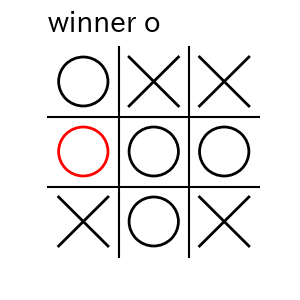

In [15]:
mb.play(ai=[ai2, ai2], gui=True);